<h3> We import numpy,matplotlib, and sklearn for math operations, plotting, and linear regression, respectively. </h3>

In [24]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<h3> We first define a function that checks if a number is a prime number, i.e. having only two distinct divisors: itself and 1. </h3>

In [25]:
def primecheck(q): #checks if q is a prime number
    
    if isinstance(q,float) is True:
        return False
    
    if q <= 1:
        return False
    
    if q == 2:
        return True
    
    if q == 3:
        return True
    
    for i in range (2,q):
    
        if (q/i).is_integer() is True:
            break
    
    if (q/i).is_integer() is False:
        return True     

    else:
        return False

<h3> The following function lists all primes between 1 and n. </h3>

In [26]:
def listprimes(n): #lists primes between 1 and n
    
    if isinstance(n,float) is True:
        print("n must be a positive integer > 2")
        return None 
    
    if n < 3:
        print("n must be a positive integer > 2")
        return None
    
    if n == 3:
        return 2
    
    for i in range (0,n):
        
        if primecheck(i) is True:
            print(i)
            

<h3> The following function counts all the prime numbers between 1 and m. </h3>

In [27]:
def primecount(m): #counts the number of primes between 1 and m
    
    if isinstance(m,float) is True:
        print("m must be a positive integer > 2")
        return None
    
    if m < 3:
        print("m must be a positive integer > 2")
        return None
    
    if m == 3:
        return 1
    
    j = 0
    
    for i in range (0,m):
        
        if primecheck(i) is True:
            j = j+1
            
    return j

<h3> The following function sums all the prime numbers between 1 and p. </h3>

In [28]:
def sumprimes(p): #sums all primes between 1 and p
    
    if isinstance(p,float) is True:
        print("p must be a positive integer > 3")
        return None
    
    if p < 3: 
        print("p must be a positive integer > 3")
        return None
    
    j = 0
    
    for i in range (0,p):
        
        if primecheck(i) is True:
            j = j + i

    return j

<h3> The following function gives the nth prime number. </h3>

In [29]:
def nthprime(n): #gives nth prime  
    
    i = 0
    j = 0

    while j<n:
        
        i = i+1
    
        if primecheck(i) is True:
            j=j+1

    return i

<h3> The following function gives the sum of the first prime numbers. </h3>

In [30]:
def sumfirstprimes(n): #gives sum of first n primes
    
    if isinstance(n,float) is True:
        print("n must be a positive integer")
        return None
    
    if n<1:
        print("n must be a positive integer")
        return None

    i = 0
    j = 0
    k = 0
    
    while j!=n:
        
        i = i+1
    
        if primecheck(i) is True:
        
            j=j+1
            k = i+k
            
    return k

<h3> We will use the following function to generate points for the sum of the first 100 primes. </h3>

In [31]:
def listfirstprimesums(n):
    
    if isinstance(n,float) is True:
        print("n must be a positive integer")
        return None
    
    if n<1:
        print("n must be a positive integer")
        return None
    
    sumlist = []

    for i in range(1,n+1,1):
        y = sumfirstprimes(i)
        sumlist.append(y)

    return(sumlist)

n = 100
plt.figure(figsize=(8,8))
x = np.array([*range(1,n+1,1)])
y = listfirstprimesums(n)

<Figure size 576x576 with 0 Axes>

<h3> We will use polynomial regression to predict the sum of first primes (n=2,n=3). Bach and Shallit (1996) suggested that 
the sum of first primes $\sim \frac{n^2}{2}\ln(n).$ </h3>

[  0.         -43.8478164    2.80661222]
296.8622758193842
[ 0.00000000e+00 -1.81853615e+01  2.17455260e+00  4.17201068e-03]
75.51499773589512


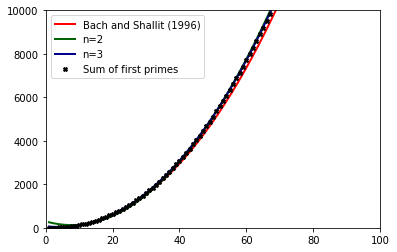

In [32]:
#Bach and Shallit
x1 = np.linspace(1,n)
y1 = (0.5)*(x1**2)*np.log(x1)


X = x.reshape(-1,1)
# Change the order here. degree is same as M
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)


# Fit a Polynomial Curve(n=2)
# Also prints the coefficients
X_poly2 = poly2.fit_transform(X)
poly2.fit(X_poly2, y)
linreg = LinearRegression()
linreg.fit(X_poly2, y)
y_pred2 = linreg.predict(X_poly2)
print(linreg.coef_)
print(linreg.intercept_)


# Fit a Polynomial Curve(n=3)
X_poly3 = poly3.fit_transform(X)
poly3.fit(X_poly3, y)
linreg = LinearRegression()
linreg.fit(X_poly3, y)
y_pred3 = linreg.predict(X_poly3)
print(linreg.coef_)
print(linreg.intercept_)


plt.ylim(top=10000,bottom=0) 
plt.xlim(left=0,right=100)
plt.plot(x1,y1,color = 'red', linewidth=2, label = 'Bach and Shallit (1996)')
plt.plot(x, y_pred2, color='darkgreen', linewidth=2, label = 'n=2')
plt.plot(x, y_pred3, color='darkblue', linewidth=2, label = 'n=3')
plt.plot(x,y,'X', color='black', markersize=4, label = 'Sum of first primes')
plt.legend(loc = 'upper left',prop={'size': 10})

<h3> Here we see that the sum of first primes $\sum P$ can be predicted by the following polynomials: <br/> <br/> 
$
\begin{equation}
\sum P \sim a_3n^3 + a_2n^2 + a_1n + a_0 \\
\sum P \sim b_2n^2 + b_1n + b_0
\end{equation}
$
<br/> <br/> where, $a_3, a_2, a_1, a_0 =$ 4.17201068e-03, 2.17455260, -1.81853615e+01, and 75.51499773589512, respectively. Similarly, $b_2, b_1, b_0 =$ 2.80661222, -43.8478164, and 296.8622758193842, respectively. 
</h3>